In [1]:
import os
import glob
import zarrtools
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

# ocean_scalar

In [2]:
path = '/group/pawsey0315/CAFE/historical/WIP/c5-d60-pX-ctrl-19601101/'
ensembles = 20

rows =  [({'ensemble' : e}, sorted(
    glob.glob(os.path.join(path,'mem' + str(e).zfill(3)+ '/ocean_scalar*.nc')))[:-1]
         ) for e in range(1,ensembles+1)]

# Mem010 has been restarted at 1800 s so remove the last few years
rows = [row if i != 9 else (row[0], row[1][:-3]) for i, row in enumerate(rows)]

In [3]:
heat = zarrtools.open_and_merge(rows)['temp_total'].squeeze().compute()
long_name = heat.attrs['long_name']
units = heat.attrs['units']

In [4]:
clim_period = slice('1980','1999')
clim = heat.sel(time=clim_period).mean('ensemble').groupby('time.month').mean('time')

heat_anom = heat.groupby('time.month') - clim

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


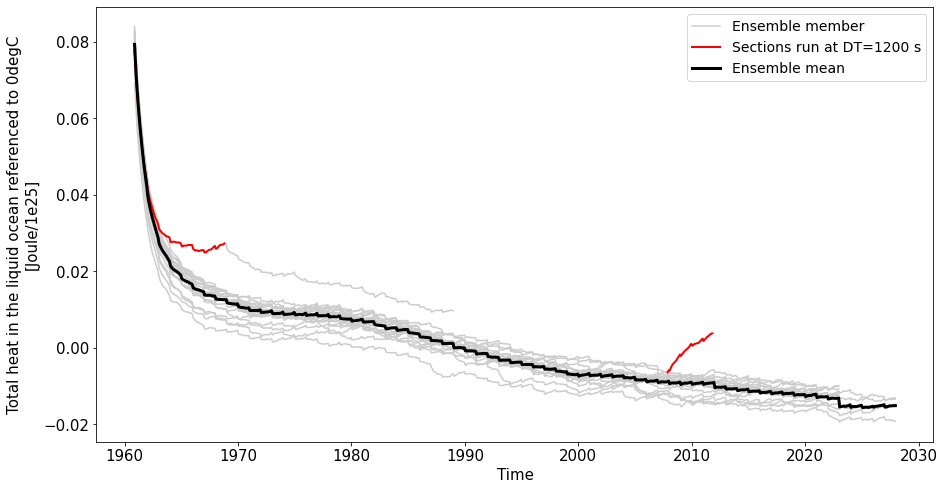

In [5]:
import matplotlib
fs = 15
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : fs}

matplotlib.rc('font', **font)
fig, ax = plt.subplots(1,1, figsize=(15,8))

ax.plot([np.nan, np.nan], [np.nan, np.nan], color=[0.8,0.8,0.8], label='Ensemble member')
for e in heat_anom.ensemble.values:
    ax.plot([np.datetime64(t.strftime()) for t in heat_anom.time.values],
            heat_anom.sel(ensemble=e), color=[0.8,0.8,0.8], label='_nolabel_')
    
# The first 96 months of mem007 were run at DT=1200
ax.plot([np.datetime64(t.strftime()) for t in heat_anom.time.values[:96]],
         heat_anom.sel(ensemble=7)[:96], color='r', linewidth=2, label='_nolabel_')

# Months 564-612 of mem010 were run at DT=1200
ax.plot([np.datetime64(t.strftime()) for t in heat_anom.time.values[564:612]],
         heat_anom.sel(ensemble=10)[564:612], color='r', linewidth=2, label='Sections run at DT=1200 s')

ax.plot([np.datetime64(t.strftime()) for t in heat_anom.time.values],
        heat_anom.mean('ensemble'), color='k', linewidth=3, label='Ensemble mean')

ax.legend(fontsize=fs-1)
ax.set_ylabel(f'{long_name}\n[{units}]');
ax.set_xlabel('Time');